In [1]:
from google.colab import drive
import zipfile
import os
import pandas as pd

# Monter Google Drive
drive.mount('/content/drive')

# Chemins vers les fichiers ZIP
chemin_data_zip = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/data.zip"
chemin_models_zip = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/Models.zip"
chemin_datasets = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/"

# Fonction pour extraire un fichier ZIP dans un répertoire donné
def extraire_zip(chemin_zip, extraction_folder):
    with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
        zip_ref.extractall(extraction_folder)
    print(f"Fichiers extraits dans {extraction_folder}")

# Extraire les fichiers ZIP
extraire_zip(chemin_data_zip, "/content/cassava_root_segmentation/data")
extraire_zip(chemin_models_zip, "/content/cassava_root_segmentation/Models")

# Vérifier les fichiers CSV dans le dossier datasets
def charger_csv(dossier):
    fichiers_csv = [f for f in os.listdir(dossier) if f.endswith('.csv')]
    for fichier in fichiers_csv:
        print(f"Chargement du fichier CSV : {fichier}")
        df = pd.read_csv(os.path.join(dossier, fichier))
        print(df.head())  # Afficher les premières lignes du CSV
        print(f"Dimensions de {fichier}: {df.shape}")
    return fichiers_csv

# Charger les CSV dans le dossier datasets
fichiers_csv = charger_csv(chemin_datasets)

# Analyser la structure de data.zip (train et test)
def analyser_structure_data(data_folder):
    train_folder = os.path.join(data_folder, 'train')
    test_folder = os.path.join(data_folder, 'test')

    # Liste des sous-dossiers (chaque sous-dossier devrait correspondre à un FolderName)
    print("Analyse de la structure du dossier 'train' :")
    for root, dirs, files in os.walk(train_folder):
        if dirs:
            print(f"Sous-dossiers dans {root}: {dirs}")
        else:
            print(f"Pas de sous-dossier dans {root}, mais des fichiers : {files}")

    print("\nAnalyse de la structure du dossier 'test' :")
    for root, dirs, files in os.walk(test_folder):
        if dirs:
            print(f"Sous-dossiers dans {root}: {dirs}")
        else:
            print(f"Pas de sous-dossier dans {root}, mais des fichiers : {files}")

# Analyser la structure des données dans 'data.zip' (train et test)
analyser_structure_data("/content/cassava_root_segmentation/data")

# Fonction pour compter le nombre d'images dans chaque sous-dossier
def compter_images(data_folder):
    images_count = {}
    for root, dirs, files in os.walk(data_folder):
        for dir_name in dirs:
            path = os.path.join(root, dir_name)
            images = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]  # Supposons que les images soient en .jpg ou .png
            images_count[dir_name] = len(images)
    return images_count

# Compter les images dans le dossier 'train' et 'test'
train_images_count = compter_images("/content/cassava_root_segmentation/data/train")
test_images_count = compter_images("/content/cassava_root_segmentation/data/test")

print("\nNombre d'images dans chaque sous-dossier de 'train' :")
print(train_images_count)

print("\nNombre d'images dans chaque sous-dossier de 'test' :")
print(test_images_count)


Mounted at /content/drive
Fichiers extraits dans /content/cassava_root_segmentation/data
Fichiers extraits dans /content/cassava_root_segmentation/Models
Chargement du fichier CSV : Sample_Submission.csv
                 ID  RootVolume
0  ID_208667_Hnkl8q           0
1  ID_285249_Jnjvav           0
2  ID_697947_Yec6bd           0
3  ID_534638_X3j91f           0
4  ID_929298_Xvymuz           0
Dimensions de Sample_Submission.csv: (130, 2)
Chargement du fichier CSV : Train.csv
                 ID  FolderName  PlantNumber Side  Start  End  RootVolume  \
0  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
1  ID_718181_Bslpwx  Ypktwvqjbn            7    L     33   41         1.5   
2  ID_465762_L1n61d  Ox18ob0syv            4    R     21   28         2.7   
3  ID_626872_Pbmx2e  Hqcekwpxgu            2    R     30   39         2.6   
4  ID_518846_Opko8c  Ummqfuetoc            1    R     17   26         2.7   

             Genotype  Stage  
0  IITA-TMS-IBA000070  Ear

In [2]:
import pandas as pd

# Fonction pour afficher les informations des fichiers CSV
def afficher_informations_csv(fichier_csv):
    # Charger le fichier CSV
    df = pd.read_csv(fichier_csv)

    # Afficher la forme (nombre de lignes et de colonnes)
    print(f"Dimensions de {fichier_csv}: {df.shape}")

    # Afficher les cinq premières lignes du fichier CSV
    print(f"Les cinq premières lignes de {fichier_csv}:")
    print(df.head())
    print("\n")

    return df

# Chemins vers les fichiers CSV Train.csv et Test.csv
train_csv = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv"
test_csv = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Test.csv"

# Afficher les informations pour Train.csv
train_df = afficher_informations_csv(train_csv)

# Afficher les informations pour Test.csv
test_df = afficher_informations_csv(test_csv)


Dimensions de /content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv: (386, 9)
Les cinq premières lignes de /content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv:
                 ID  FolderName  PlantNumber Side  Start  End  RootVolume  \
0  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
1  ID_718181_Bslpwx  Ypktwvqjbn            7    L     33   41         1.5   
2  ID_465762_L1n61d  Ox18ob0syv            4    R     21   28         2.7   
3  ID_626872_Pbmx2e  Hqcekwpxgu            2    R     30   39         2.6   
4  ID_518846_Opko8c  Ummqfuetoc            1    R     17   26         2.7   

             Genotype  Stage  
0  IITA-TMS-IBA000070  Early  
1           IBA154810  Early  
2           IBA980581  Early  
3  IITA-TMS-IBA000070  Early  
4           IBA980581  Early  


Dimensions de /content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Tes

In [54]:
import pandas as pd

# Chemins vers les fichiers CSV
train_csv = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv"
test_csv = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Test.csv"

# Lecture des fichiers CSV avec pandas
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Affichage des dimensions
print(train_df.shape)
print(test_df.shape)


(386, 9)
(130, 8)


In [3]:
# Par exemple, si vous avez un modèle Keras (.h5) ou PyTorch (.pt)
import tensorflow as tf  # Si le modèle est pour TensorFlow
import torch  # Si le modèle est pour PyTorch

# Lister les fichiers dans le sous-dossier 'Models'
def lister_fichiers(models_folder):
    fichiers = os.listdir(models_folder)
    print(f"Fichiers dans {models_folder}: {fichiers}")
    return fichiers

# Lister les fichiers du dossier Models
fichiers_models = lister_fichiers("/content/cassava_root_segmentation/Models")

# Vérifiez aussi les sous-dossiers pour voir si les modèles sont organisés dedans
def lister_sous_dossiers(models_folder):
    for root, dirs, files in os.walk(models_folder):
        if dirs:
            print(f"Sous-dossiers dans {root}: {dirs}")
        else:
            print(f"Pas de sous-dossier dans {root}, mais des fichiers : {files}")

# Lister les sous-dossiers dans le dossier Models
lister_sous_dossiers("/content/cassava_root_segmentation/Models")


Fichiers dans /content/cassava_root_segmentation/Models: ['Models']
Sous-dossiers dans /content/cassava_root_segmentation/Models: ['Models']
Pas de sous-dossier dans /content/cassava_root_segmentation/Models/Models, mais des fichiers : ['best_early.pt', 'best_late.pt', 'best_full.pt']


In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [5]:
from ultralytics import YOLO

# Charger un modèle YOLO
def charger_modele(modele_path):
    modele = YOLO(modele_path)  # Charge le modèle YOLO
    return modele

# Exemple de chargement d'un modèle
modele_path = "/content/cassava_root_segmentation/Models/Models/best_full.pt"  # Choisissez le modèle à charger
modele = charger_modele(modele_path)

# Afficher le modèle pour vérifier sa structure
print(modele)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (

In [6]:
# Étape 1 : Préparation des données

# Charger et associer les informations de Train.csv et Test.csv aux images correspondantes
train_images = train_df['FolderName'].map(lambda x: os.path.join('/content/cassava_root_segmentation/data/train', x))
test_images = test_df['FolderName'].map(lambda x: os.path.join('/content/cassava_root_segmentation/data/test', x))

# Fonction pour filtrer les images en fonction des plages de profondeur dynamiques
def filtrer_par_profondeur_dynamique(df, profondeur_min, profondeur_max):
    """
    Filtrer les images dont la profondeur est dans une plage dynamique définie par la profondeur_min et profondeur_max
    """
    # La condition dynamique sera basée sur Start et End
    # On applique une logique qui permet de filtrer en fonction de l'intervalle
    filtered_df = df[(df['Start'] >= profondeur_min) & (df['End'] <= profondeur_max)]

    return filtered_df

# Par exemple, on veut filtrer les lignes dont les profondeurs varient dans les plages suivantes :
# Ici, vous pouvez ajuster les plages en fonction des valeurs minimum et maximum de votre projet
train_filtered = filtrer_par_profondeur_dynamique(train_df, train_df['Start'].min(), train_df['End'].max())
test_filtered = filtrer_par_profondeur_dynamique(test_df, test_df['Start'].min(), test_df['End'].max())

# Afficher les résultats après filtrage
print(f"Images filtrées dans Train.csv : {train_filtered.shape[0]}")
print(f"Images filtrées dans Test.csv : {test_filtered.shape[0]}")


Images filtrées dans Train.csv : 386
Images filtrées dans Test.csv : 130


In [7]:
from PIL import Image
import os

def afficher_tailles_images(data_folder):
    images_count = {}
    for root, dirs, files in os.walk(data_folder):
        for dir_name in dirs:
            path = os.path.join(root, dir_name)
            images = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]  # Supposons que les images soient en .jpg ou .png
            images_count[dir_name] = len(images)

            # Parcourir chaque image dans le dossier
            for fichier in images:
                image_path = os.path.join(path, fichier)  # Définir le chemin de l'image
                # Charger l'image
                with Image.open(image_path) as img:
                    largeur, hauteur = img.size  # Récupérer les dimensions de l'image
                    print(f"Image: {fichier} - Taille: {largeur}x{hauteur}")

# Exemple d'utilisation
dossier_images = '/content/cassava_root_segmentation/data/train/'  # Met le chemin vers ton dossier d'images
afficher_tailles_images(dossier_images)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Image: Miny0c252a_L_045.png - Taille: 984x14
Image: Miny0c252a_R_063.png - Taille: 976x14
Image: Miny0c252a_R_068.png - Taille: 976x14
Image: Miny0c252a_R_025.png - Taille: 976x14
Image: Miny0c252a_L_017.png - Taille: 984x14
Image: Miny0c252a_R_033.png - Taille: 976x14
Image: Miny0c252a_L_069.png - Taille: 984x14
Image: Miny0c252a_R_024.png - Taille: 976x14
Image: Miny0c252a_R_056.png - Taille: 976x14
Image: Miny0c252a_R_016.png - Taille: 976x14
Image: Miny0c252a_R_032.png - Taille: 976x14
Image: Miny0c252a_R_055.png - Taille: 976x14
Image: Miny0c252a_R_071.png - Taille: 976x14
Image: Miny0c252a_L_027.png - Taille: 984x14
Image: Miny0c252a_L_067.png - Taille: 984x14
Image: Miny0c252a_L_009.png - Taille: 984x14
Image: Miny0c252a_R_058.png - Taille: 976x14
Image: Miny0c252a_R_037.png - Taille: 976x14
Image: Miny0c252a_R_061.png - Taille: 976x14
Image: Miny0c252a_L_003.png - Taille: 984x14
Image: Miny0c252a_L_04

In [ ]:
############################# S'execute Mais Trop de features sa met trop de temps et le traitement ne fini pas ###########################
############################################################################################################################


# import os
# import pandas as pd
# from pathlib import Path
# import numpy as np
# from PIL import Image
# from tqdm import tqdm
# from ultralytics import YOLO

# # Charger le modèle YOLO
# #modele = YOLO("yolov8n-seg.pt")

# def segmenter_racines(image_path):
#     """Retourne un DataFrame des segments trouvés dans l'image"""
#     image_path = str(Path(image_path))
#     if not os.path.exists(image_path):
#         return pd.DataFrame(columns=["x_center", "y_center", "width", "height"])

#     results = modele(image_path, conf=0.2)
#     if not results or not results[0].boxes:
#         return pd.DataFrame(columns=["x_center", "y_center", "width", "height"])

#     boxes = results[0].boxes.data.cpu().numpy()
#     return pd.DataFrame(boxes[:, :4], columns=["x_center", "y_center", "width", "height"])

# def extraire_caractéristiques(segmentations, image_width, image_height):
#     """Retourne un dictionnaire des caractéristiques extraites"""
#     if segmentations.empty:
#         return {"nb_racines": 0, "surface_totale": 0, "taille_moyenne": 0,
#                 "taille_max": 0, "taille_min": 0, "ecart_type_taille": 0,
#                 "ratio_couverture": 0, "densite_racines": 0, "x_moyen": 0, "y_moyen": 0,
#                 "ecart_x": 0, "ecart_y": 0, "aspect_ratio_moyen": 0}

#     nb_racines = segmentations.shape[0]
#     tailles = segmentations["width"] * segmentations["height"]
#     surface_totale = tailles.sum()
#     return {
#         "nb_racines": nb_racines, "surface_totale": surface_totale,
#         "taille_moyenne": tailles.mean(), "taille_max": tailles.max(), "taille_min": tailles.min(),
#         "ecart_type_taille": tailles.std(), "ratio_couverture": surface_totale / (image_width * image_height),
#         "densite_racines": nb_racines / surface_totale if surface_totale != 0 else 0,
#         "x_moyen": segmentations["x_center"].mean(), "y_moyen": segmentations["y_center"].mean(),
#         "ecart_x": segmentations["x_center"].std(), "ecart_y": segmentations["y_center"].std(),
#         "aspect_ratio_moyen": (segmentations["width"] / segmentations["height"]).mean()
#     }

# def extraire_caracteristiques_et_sauvegarder(train_df, base_folder, output_csv):
#     results = []

#     for idx, row in tqdm(train_df.iterrows(), total=len(train_df), desc="Traitement des images"):
#         folder_name = row['FolderName']
#         sous_dossier = os.path.join(base_folder, folder_name)

#         if not os.path.exists(sous_dossier):
#             continue

#         for image_name in os.listdir(sous_dossier):
#             if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 continue

#             position = 'Left' if '_L_' in image_name else 'Right' if '_R_' in image_name else None
#             if not position:
#                 continue

#             image_path = os.path.join(sous_dossier, image_name)
#             try:
#                 with Image.open(image_path) as img:
#                     image_width, image_height = img.size
#             except:
#                 continue

#             segmentations = segmenter_racines(image_path)
#             caractéristiques = extraire_caractéristiques(segmentations, image_width, image_height)

#             # Ajouter toutes les colonnes de Train.csv + nouvelles caractéristiques
#             ligne_complete = row.to_dict()
#             ligne_complete.update(caractéristiques)
#             ligne_complete["position"] = position
#             results.append(ligne_complete)

#     df_final = pd.DataFrame(results)
#     df_final.to_csv(output_csv, index=False)
#     print(f"Fichier enregistré sous {output_csv}")

# # Exécution
# train_df = pd.read_csv('/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv')
# base_folder = '/content/cassava_root_segmentation/data/train/'
# output_csv = '/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/features_extracted.csv'
# extraire_caracteristiques_et_sauvegarder(train_df, base_folder, output_csv)


In [59]:
###################### gros probleme cette approche car duplique les ligne du dataframe initial qui etai de 380 a 66plus plus ############

import os
from collections import Counter

base_folder = '/content/cassava_root_segmentation/data/train/'
train_df = pd.read_csv('/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv')

compteur_images = Counter()

for folder_name in train_df["FolderName"]:
    sous_dossier = os.path.join(base_folder, folder_name)
    if os.path.exists(sous_dossier):
        nb_images = len([f for f in os.listdir(sous_dossier) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        compteur_images[folder_name] = nb_images

print(compteur_images)  # Affiche combien d'images par dossier
print(f"Total d'images : {sum(compteur_images.values())}")


Counter({'A6dzrkjqvl': 164, 'Ypktwvqjbn': 164, 'Ox18ob0syv': 164, 'Hqcekwpxgu': 164, 'Ummqfuetoc': 164, 'B5myqsh1wi': 164, 'L8w7zu7wek': 164, 'Izbgyxre0g': 164, 'Vinlgebupo': 164, 'Hc3b9gicdo': 164, 'Lzkaccojep': 164, 'Q4uyruus4j': 164, 'Yxmmb4wt55': 164, 'Sauopakhvn': 164, 'Mpmvh2mgm3': 164, 'B8x7mhxe6z': 164, 'Kjvcz6bjfj': 164, 'Ntqusw7xpb': 164, 'Ecxdebmlnr': 164, 'V6awcupt6m': 164, 'Ah4ubi4ggi': 164, 'Ph2ti2sjzu': 164, 'Vlqr6qhbqk': 164, 'Idiolerx47': 164, 'Pw4ytibfql': 164, 'Gernxgxbnu': 164, 'Lsdgz02kdp': 164, 'Xrrcqvdbkw': 164, 'Dz9lpsl9ae': 164, 'Vlcavd4dwj': 164, 'Ifqbqqrika': 164, 'Qhqftdiz4q': 164, 'Xdi1ipcemf': 164, 'Yznlv6wrsh': 164, 'Pctl4tyb9l': 164, 'Ubgsvkns3h': 164, 'Wgutyon8uu': 164, 'Rzyf8hal4j': 164, 'Mskdmpitqk': 164, 'Me1ufzzcxk': 164, 'Mylwjeq6tq': 164, 'Qinorm9cg3': 164, 'Vbkivqphuz': 164, 'Puya1uaaln': 164, 'L5l1h3kekg': 164, 'Pucqtyga9u': 164, 'P3om3dfa78': 164, 'Ot13d4nq6t': 164, 'Jtcfkuovxk': 164, 'F3odypnsyf': 164, 'Lwuwokuhrf': 164, 'Hzapvbcfm8': 164, 'H9

In [ ]:
## 7 a 8h pour finir l'execution raison pour la quel jai opter stocker dans un dataset et apres continuer ##############

import os
import pandas as pd
from pathlib import Path
import numpy as np
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO

# Charger le modèle YOLO [jai deja charger plus haut]
# modele = YOLO("yolov8n-seg.pt")

def segmenter_racines(image_path):
    """Retourne un DataFrame des segments trouvés dans l'image"""
    image_path = str(Path(image_path))
    if not os.path.exists(image_path):
        return pd.DataFrame(columns=["x_center", "y_center", "width", "height"])

    results = modele(image_path, conf=0.2)
    if not results or not results[0].boxes:
        return pd.DataFrame(columns=["x_center", "y_center", "width", "height"])

    boxes = results[0].boxes.data.cpu().numpy()
    return pd.DataFrame(boxes[:, :4], columns=["x_center", "y_center", "width", "height"])

def extraire_caracteristiques(segmentations, image_width, image_height):
    """Retourne uniquement les 5 caractéristiques essentielles"""
    if segmentations.empty:
        return {"nb_racines": 0, "surface_totale": 0, "taille_moyenne": 0,
                "ratio_couverture": 0, "densite_racines": 0}

    nb_racines = segmentations.shape[0]
    tailles = segmentations["width"] * segmentations["height"]
    surface_totale = tailles.sum()

    return {
        "nb_racines": nb_racines,
        "surface_totale": surface_totale,
        "taille_moyenne": tailles.mean(),
        "ratio_couverture": surface_totale / (image_width * image_height),
        "densite_racines": nb_racines / surface_totale if surface_totale != 0 else 0
    }

def extraire_caracteristiques_et_sauvegarder(train_df, base_folder, output_csv):
    results = []

    for idx, row in tqdm(train_df.iterrows(), total=len(train_df), desc="Traitement des images"):
        folder_name = row['FolderName']
        sous_dossier = os.path.join(base_folder, folder_name)

        if not os.path.exists(sous_dossier):
            continue

        for image_name in os.listdir(sous_dossier):
            if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            position = 'Left' if '_L_' in image_name else 'Right' if '_R_' in image_name else None
            if not position:
                continue

            image_path = os.path.join(sous_dossier, image_name)
            try:
                with Image.open(image_path) as img:
                    image_width, image_height = img.size
            except:
                continue

            segmentations = segmenter_racines(image_path)
            caractéristiques = extraire_caracteristiques(segmentations, image_width, image_height)

            # Ajouter seulement les colonnes de Train.csv + les 5 caractéristiques sélectionnées
            ligne_complete = row.to_dict()
            ligne_complete.update(caractéristiques)
            ligne_complete["position"] = position
            results.append(ligne_complete)

    df_final = pd.DataFrame(results)
    df_final.to_csv(output_csv, index=False)
    print(f"Fichier enregistré sous {output_csv}")

# Exécution
train_df = pd.read_csv('/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Train.csv')
base_folder = '/content/cassava_root_segmentation/data/train/'
output_csv = '/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/features_extracted.csv'
extraire_caracteristiques_et_sauvegarder(train_df, base_folder, output_csv)


In [51]:
########################### je continue visualise mon nouveau dataset ###########################



import pandas as pd

# Charger le dataset
chemin_fichier = "drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/features_extracted.csv"
df = pd.read_csv(chemin_fichier)

# Afficher les premières lignes
print(df.head())

# Vérifier les informations générales
print(df.info())

# Résumé statistique
print(df.describe())

print(df.shape)


                 ID  FolderName  PlantNumber Side  Start  End  RootVolume  \
0  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
1  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
2  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
3  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
4  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   

             Genotype  Stage  nb_racines  surface_totale  taille_moyenne  \
0  IITA-TMS-IBA000070  Early           0        0.000000        0.000000   
1  IITA-TMS-IBA000070  Early           0        0.000000        0.000000   
2  IITA-TMS-IBA000070  Early           2    11638.628906     5819.314453   
3  IITA-TMS-IBA000070  Early           0        0.000000        0.000000   
4  IITA-TMS-IBA000070  Early           0        0.000000        0.000000   

   ratio_couverture  densite_racines position  
0          0.000000         0.00

In [43]:
######################### Analyse des features (statistiques, types, corrélations) ##########################
# Séparer les features numériques et catégoriques
features_numeriques = df.select_dtypes(include=['number']).columns
features_categoriques = df.select_dtypes(exclude=['number']).columns

print("Features numériques:", features_numeriques)
print("Features catégoriques:", features_categoriques)


Features numériques: Index(['PlantNumber', 'Start', 'End', 'RootVolume', 'nb_racines',
       'surface_totale', 'taille_moyenne', 'ratio_couverture',
       'densite_racines'],
      dtype='object')
Features catégoriques: Index(['ID', 'FolderName', 'Side', 'Genotype', 'Stage', 'position'], dtype='object')


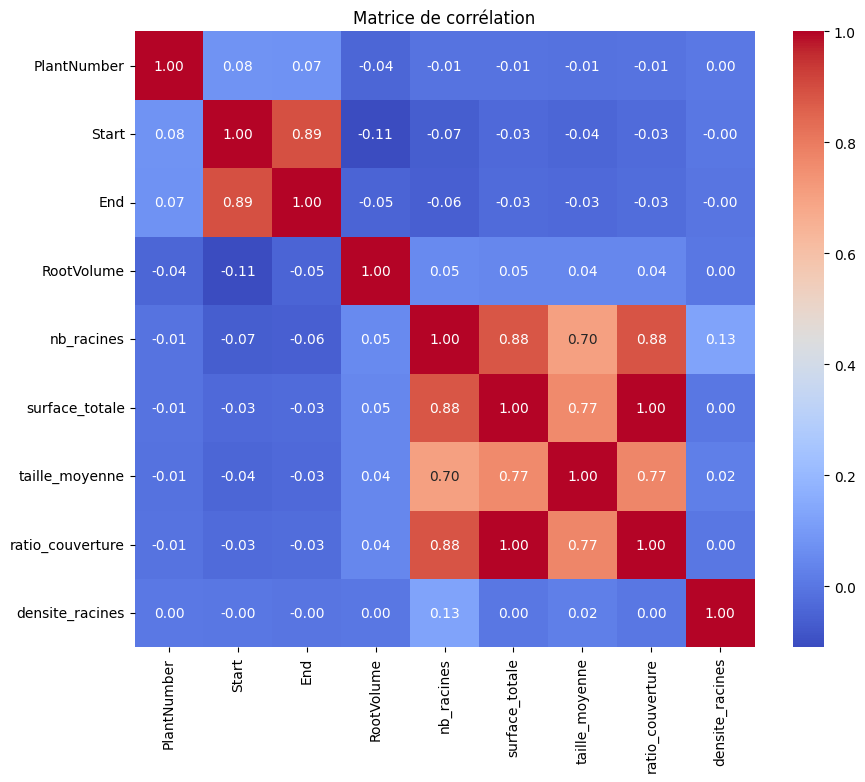

In [44]:
########################## Visualisation des corrélation  #######################

import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df[features_numeriques].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [45]:
#############################  On retire les variables fortement corrélées pour éviter la redondance. ##############################

import numpy as np

# Matrice de corrélation
correlation_matrix = df[features_numeriques].corr().abs()

# Trouver les features fortement corrélées (seuil > 0.85)
seuil = 0.85
features_corrélées = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > seuil:
            feature_name = correlation_matrix.columns[i]
            features_corrélées.add(feature_name)

print("Features fortement corrélées à retirer:", features_corrélées)

# Nettoyer X en retirant ces features

X = df[features_numeriques].drop(columns=['RootVolume'])  # Retirer la target
X_clean = X.drop(columns=features_corrélées)


Features fortement corrélées à retirer: {'surface_totale', 'ratio_couverture', 'End'}


In [ ]:
###################### Plus de 24h pour terminer l'execution ce qui n'est pas bon #############################


# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import RFECV

# # Détecter automatiquement les variables numériques et catégoriques
# features_categoriques = df.select_dtypes(include=['object']).columns.tolist()
# features_numeriques = df.select_dtypes(exclude=['object']).columns.tolist()

# # Séparer les features
# df_numerique = df[features_numeriques]
# df_categorique = df[features_categoriques]

# # Encodage One-Hot
# #encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# df_categorique_encoded = pd.DataFrame(encoder.fit_transform(df_categorique),
#                                       index=df_categorique.index)

# # Renommer les colonnes
# df_categorique_encoded.columns = encoder.get_feature_names_out(features_categoriques)

# # Concaténer les données encodées avec les numériques
# df_encoded = pd.concat([df_numerique, df_categorique_encoded], axis=1)

# # Vérification des dimensions après encodage
# print("Dimensions après encodage:", df_encoded.shape)

# # Définir X (features) et y (target)
# if 'RootVolume' in df_encoded.columns:
#     X = df_encoded.drop(columns=['RootVolume'])  # Retirer la target
# else:
#     raise ValueError("Erreur: RootVolume n'est pas dans df_encoded.columns")

# y = df['RootVolume']

# # Diviser en train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Modèle de base (RandomForest)
# model = RandomForestRegressor(n_estimators=100, random_state=42)

# # RFECV pour la sélection des features
# rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')
# rfecv.fit(X_train, y_train)

# # Features sélectionnées
# selected_features = X.columns[rfecv.support_]
# print("Features sélectionnées:", selected_features)


In [15]:
################### pas tres comprehensible dans la mesure ou il y'a les nouvelle colonne comme "ID_XXX, Genotype_XXX...." ###################
###################### et met pratiquement 2h a 3h pour s'executer ....######################################################################


import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Détecter automatiquement les variables numériques et catégoriques
features_categoriques = df.select_dtypes(include=['object']).columns.tolist()
features_numeriques = df.select_dtypes(exclude=['object']).columns.tolist()

# Séparer les features
df_numerique = df[features_numeriques]
df_categorique = df[features_categoriques]

# Encodage One-Hot
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_categorique_encoded = pd.DataFrame(encoder.fit_transform(df_categorique),
                                      index=df_categorique.index)

# Renommer les colonnes
df_categorique_encoded.columns = encoder.get_feature_names_out(features_categoriques)

# Concaténer les données encodées avec les numériques
df_encoded = pd.concat([df_numerique, df_categorique_encoded], axis=1)

# Vérification des dimensions après encodage
print("Dimensions après encodage:", df_encoded.shape)

# Définir X (features) et y (target)
if 'RootVolume' in df_encoded.columns:
    X = df_encoded.drop(columns=['RootVolume'])  # Retirer la target
else:
    raise ValueError("Erreur: RootVolume n'est pas dans df_encoded.columns")

y = df['RootVolume']

# Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de base (RandomForest avec moins d'arbres)
model = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)

# RFECV pour la sélection des features (avec moins de données)
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='r2', n_jobs=-1)
rfecv.fit(X_train.sample(frac=0.5, random_state=42), y_train.sample(frac=0.5, random_state=42))

# Features sélectionnées
selected_features = X.columns[rfecv.support_]
print("Features sélectionnées:", selected_features)


Dimensions après encodage: (63301, 506)
Features sélectionnées: Index(['PlantNumber', 'Start', 'End', 'ID_ID_117194_Z3xwja',
       'ID_ID_140387_Y10vsb', 'ID_ID_157206_Vnoejp', 'ID_ID_164571_C087eg',
       'ID_ID_171226_Jaqvha', 'ID_ID_174315_Lw9ftc', 'ID_ID_175452_Du2oso',
       'ID_ID_224297_Plu8jf', 'ID_ID_260205_Ehppmv', 'ID_ID_260577_Zumui0',
       'ID_ID_307257_Kzg6ft', 'ID_ID_311146_Vhntsv', 'ID_ID_352618_Bkgck9',
       'ID_ID_376269_Whviji', 'ID_ID_386102_Nxfbxd', 'ID_ID_410473_Jw3xrp',
       'ID_ID_438041_Ccgrlo', 'ID_ID_441610_X5hyun', 'ID_ID_450500_H3gltt',
       'ID_ID_470797_Ayxwed', 'ID_ID_473931_A7uktd', 'ID_ID_490708_Isn2o5',
       'ID_ID_514740_Z6tjqi', 'ID_ID_522599_Uvg4bq', 'ID_ID_534910_Ecsqtx',
       'ID_ID_556927_D0wlds', 'ID_ID_568055_Ynpzbb', 'ID_ID_579277_S5z2ov',
       'ID_ID_588554_Hzpbye', 'ID_ID_598272_Axnwor', 'ID_ID_598878_Hoeecl',
       'ID_ID_641773_Arvdbh', 'ID_ID_660348_Duhci3', 'ID_ID_672578_Nifv71',
       'ID_ID_677302_Zjlged', 'ID_ID_68

In [ ]:
# Étape 4 : Prédiction du volume des racines

In [21]:
!pip install -U scikit-learn


In [ ]:
###### j'encode de nouveua pour eviter d'execuer le code plus haut qui prend plus de 6h et l'encodage One-Hot creer des nouvelle features mois cible  ############

In [18]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Détecter automatiquement les variables numériques et catégoriques
features_categoriques = df.select_dtypes(include=['object']).columns.tolist()
features_numeriques = df.select_dtypes(exclude=['object']).columns.tolist()

# Séparer les features
df_numerique = df[features_numeriques]
df_categorique = df[features_categoriques]

# Encodage One-Hot
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_categorique_encoded = pd.DataFrame(encoder.fit_transform(df_categorique),
                                      index=df_categorique.index)

# Renommer les colonnes
df_categorique_encoded.columns = encoder.get_feature_names_out(features_categoriques)

# Concaténer les données encodées avec les numériques
df_encoded = pd.concat([df_numerique, df_categorique_encoded], axis=1)

# Résumé statistique
print(df_encoded.describe())

        PlantNumber         Start           End    RootVolume    nb_racines  \
count  63301.000000  63301.000000  63301.000000  63301.000000  63301.000000   
mean       3.974076     27.018515     36.990127      2.052373      0.659674   
std        1.506272      8.224087      7.950225      1.524340      1.273297   
min        1.000000      8.000000     14.000000      0.000000      0.000000   
25%        3.000000     22.000000     32.000000      0.900000      0.000000   
50%        4.000000     26.000000     37.000000      1.900000      0.000000   
75%        5.000000     32.000000     42.000000      2.700000      1.000000   
max        7.000000     49.000000     60.000000     11.000000     17.000000   

       surface_totale  taille_moyenne  ratio_couverture  densite_racines  \
count    63301.000000    63301.000000      63301.000000     63301.000000   
mean      3073.332454     1343.093699          0.228036         0.000210   
std       8112.376188     2449.541132          0.593671     

In [24]:
################  Encodage de Fréquence ####################################################
################ Encodage de Fréquence : Si vous souhaitez simplement remplacer les catégories par leur fréquence d'apparition, utilisez l'encodage de fréquence.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger le dataset
chemin_fichier = "drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/features_extracted.csv"
df = pd.read_csv(chemin_fichier)

# Encodage de Fréquence pour Genotype
frequency_map = df['Genotype'].value_counts(normalize=True).to_dict()
df['Genotype_encoded'] = df['Genotype'].map(frequency_map)

# Sélection des features
selected_features = ['PlantNumber', 'Start', 'nb_racines', 'taille_moyenne', 'densite_racines',
                     'Genotype_encoded', 'Side', 'Stage']

# Définir X et y
X = df[selected_features]
y = df['RootVolume']

# Encodage One-Hot pour Side et Stage
X = pd.get_dummies(X, columns=['Side', 'Stage'], drop_first=True)

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Meilleur modèle : {grid_search.best_params_}")
print(f"MAE (Validation) : {mae:.4f}")
print(f"RMSE (Validation) : {rmse:.4f}")
print(f"R² : {r2:.4f}")

Meilleur modèle : {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 30}
MAE (Validation) : 0.4057
RMSE (Validation) : 0.6784
R² : 0.8008


In [46]:
print(X.shape)
print(df.shape) #sa plusieurs features a cause de l'encodage fait qi a creer des new colonnes

(63301, 8)
(63301, 15)


In [27]:
##################### Encodage de Cible : Si vous souhaitez capturer la relation entre les catégories et la variable cible RootVolume, utilisez l'encodage de cible.
########################################################################## je ne dois pas executer ceci #####################################

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger le dataset
chemin_fichier = "drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/features_extracted.csv"
df = pd.read_csv(chemin_fichier)

# Encodage de Cible pour Genotype
target_map = df.groupby('Genotype')['RootVolume'].mean().to_dict()
df['Genotype_encoded'] = df['Genotype'].map(target_map)

# Sélection des features
selected_features = ['PlantNumber', 'Start', 'nb_racines', 'taille_moyenne', 'densite_racines',
                     'Genotype_encoded', 'Side', 'Stage']

# Définir X et y
X = df[selected_features]
y = df['RootVolume']

# Encodage One-Hot pour Side et Stage
X = pd.get_dummies(X, columns=['Side', 'Stage'], drop_first=True)

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Meilleur modèle : {grid_search.best_params_}")
print(f"MAE (Validation) : {mae:.4f}")
print(f"RMSE (Validation) : {rmse:.4f}")
print(f"R² : {r2:.4f}")

Meilleur modèle : {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 30}
MAE (Validation) : 0.3703
RMSE (Validation) : 0.6460
R² : 0.8194


In [ ]:
############################ je travail maintenant sur les datas de test notament les images il faut aussi que j'extract les new features ########################
############################ coe fai sur les datas de training et apres cela fait j'utilise les noms des features select pour le training ########################
############################ et je lance le testing dessus #######################################################################################################

In [28]:
import os
import pandas as pd
from pathlib import Path
import numpy as np
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO

# je Charge le modèle YOLO de la competion
# modele = YOLO("yolov8n-seg.pt")

def segmenter_racines(image_path):
    """Retourne un DataFrame des segments trouvés dans l'image"""
    image_path = str(Path(image_path))
    if not os.path.exists(image_path):
        return pd.DataFrame(columns=["x_center", "y_center", "width", "height"])

    results = modele(image_path, conf=0.2)
    if not results or not results[0].boxes:
        return pd.DataFrame(columns=["x_center", "y_center", "width", "height"])

    boxes = results[0].boxes.data.cpu().numpy()
    return pd.DataFrame(boxes[:, :4], columns=["x_center", "y_center", "width", "height"])

def extraire_caracteristiques(segmentations, image_width, image_height):
    """Retourne uniquement les 5 caractéristiques essentielles"""
    if segmentations.empty:
        return {"nb_racines": 0, "surface_totale": 0, "taille_moyenne": 0,
                "ratio_couverture": 0, "densite_racines": 0}

    nb_racines = segmentations.shape[0]
    tailles = segmentations["width"] * segmentations["height"]
    surface_totale = tailles.sum()

    return {
        "nb_racines": nb_racines,
        "surface_totale": surface_totale,
        "taille_moyenne": tailles.mean(),
        "ratio_couverture": surface_totale / (image_width * image_height),
        "densite_racines": nb_racines / surface_totale if surface_totale != 0 else 0
    }

def extraire_caracteristiques_et_sauvegarder(test_df, base_folder, output_csv):
    results = []

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Traitement des images de test"):
        folder_name = row['FolderName']
        sous_dossier = os.path.join(base_folder, folder_name)

        if not os.path.exists(sous_dossier):
            continue

        for image_name in os.listdir(sous_dossier):
            if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            position = 'Left' if '_L_' in image_name else 'Right' if '_R_' in image_name else None
            if not position:
                continue

            image_path = os.path.join(sous_dossier, image_name)
            try:
                with Image.open(image_path) as img:
                    image_width, image_height = img.size
            except:
                continue

            segmentations = segmenter_racines(image_path)
            caractéristiques = extraire_caracteristiques(segmentations, image_width, image_height)

            # Ajouter seulement les colonnes de Test.csv + les 5 caractéristiques sélectionnées
            ligne_complete = row.to_dict()
            ligne_complete.update(caractéristiques)
            ligne_complete["position"] = position
            results.append(ligne_complete)

    df_final = pd.DataFrame(results)
    df_final.to_csv(output_csv, index=False)
    print(f"Fichier enregistré sous {output_csv}")

# Exécution pour les données de test
test_df = pd.read_csv('/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/datasets/Test.csv')
base_folder = '/content/cassava_root_segmentation/data/test/'
output_csv = '/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/new_extracted_test.csv'
extraire_caracteristiques_et_sauvegarder(test_df, base_folder, output_csv)


Output hidden; open in https://colab.research.google.com to view.

In [56]:
##################### je travaille sur mon nouveau dataset de test creer ########################


import pandas as pd

# Charger le dataset
chemin_fichier_test = "/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/new_dataset/new_extracted_test.csv"
df_test = pd.read_csv(chemin_fichier_test)

# Afficher les premières lignes
print(df_test.head())

# Vérifier les informations générales
print(df_test.info())

# Résumé statistique
print(df_test.describe())

print(df_test.shape)



                 ID  FolderName  PlantNumber Side  Start  End  \
0  ID_208667_Hnkl8q  L5l1h3kekg            7    L     38   50   
1  ID_208667_Hnkl8q  L5l1h3kekg            7    L     38   50   
2  ID_208667_Hnkl8q  L5l1h3kekg            7    L     38   50   
3  ID_208667_Hnkl8q  L5l1h3kekg            7    L     38   50   
4  ID_208667_Hnkl8q  L5l1h3kekg            7    L     38   50   

             Genotype  Stage  nb_racines  surface_totale  taille_moyenne  \
0  IITA-TMS-IBA000070  Early           5     21720.43750     4344.087402   
1  IITA-TMS-IBA000070  Early           0         0.00000        0.000000   
2  IITA-TMS-IBA000070  Early           1      5157.27832     5157.278320   
3  IITA-TMS-IBA000070  Early           0         0.00000        0.000000   
4  IITA-TMS-IBA000070  Early           0         0.00000        0.000000   

   ratio_couverture  densite_racines position  
0          1.587983         0.000230    Right  
1          0.000000         0.000000    Right  
2       

In [57]:
######################################### Test de prediction avec les daatset de test normaliser #########################
######################################### Encodage de la feauture categorique "Genotype " avec Encodage de Fréquence ############

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encodage de Fréquence pour Genotype
frequency_map = df_test['Genotype'].value_counts(normalize=True).to_dict()
df_test['Genotype_encoded'] = df_test['Genotype'].map(frequency_map)

# Sélection des features
selected_features = ['PlantNumber', 'Start', 'nb_racines', 'taille_moyenne', 'densite_racines',
                     'Genotype_encoded', 'Side', 'Stage']

# Vérifier que toutes les features sélectionnées sont présentes dans df_test
missing_features = [col for col in selected_features if col not in df_test.columns]
if missing_features:
    raise ValueError(f"Les features suivantes sont manquantes dans df_test : {missing_features}")

# Sélectionner uniquement les features retenues
X_test_final = df_test[selected_features]


print("Dimensions de X_test_final avant l'encodage:" ,X_test_final.shape)
# Encodage One-Hot pour Side et Stage
X_test_final = pd.get_dummies(X_test_final, columns=['Side', 'Stage'], drop_first=True)



print("Dimensions de X_test_final apres l'encodage:" ,X_test_final.shape)

# Prédictions sur le dataset de test
y_test_pred = best_model.predict(X_test_final)

print("Prédictions terminées avec succès !")
print(y_test_pred)
print("Dimensions de test_df :", test_df.shape)
print("Dimensions de y_test_pred :", y_test_pred.shape)

Dimensions de X_test_final avant l'encodage: (21320, 8)
Dimensions de X_test_final apres l'encodage: (21320, 8)
Prédictions terminées avec succès !
[    0.37317     0.29081     0.20638 ...     0.65044     0.75278     0.63311]
Dimensions de test_df : (130, 8)
Dimensions de y_test_pred : (21320,)


In [58]:
# Ajouter les prédictions au DataFrame test
df_test['RootVolume'] = y_test_pred  # je use le nom pour correspondre à la soumission

# Sauvegarder le fichier au bon format
df_test[['ID', 'RootVolume']].to_csv('/content/drive/My Drive/Zindi Hackathon 2025-02-08/cassava_root_segmentation/submission.csv', index=False)

print("Prédictions sauvegardées dans 'submission.csv' avec le bon format !")


Prédictions sauvegardées dans 'submission.csv' avec le bon format !
